In [149]:
# Dependencies 
import pandas as pd
import matplotlib as plt
from pathlib import Path
import numpy as np
plt.style.use("bmh")
import matplotlib.pyplot as plt


In [2]:
# File to Load
file = Path("../Resources/U.S._Chronic_Disease_Indicators.csv")


In [3]:
# Read U.S chronic desease data File and store into Pandas DataFrame
chronic_df = pd.read_csv(file, encoding="ISO-8859-1")

# Data Frame chronic disease, 5 first rows 
chronic_df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,NaN,%,Crude Prevalence,...,DIS,DIS01,NaN,CRDPREV,AGE,AGE65P,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,NaN,%,Crude Prevalence,...,ART,ART01,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
2,2019,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,NaN,%,Crude Prevalence,...,IMM,IMM01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,NaN,Years,Number,...,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


#Cleaning data

In [4]:
# Exploring to see all our columns 
chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [5]:
# Exploring the whole data 
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311745 entries, 0 to 311744
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  311745 non-null  int64  
 1   YearEnd                    311745 non-null  int64  
 2   LocationAbbr               311745 non-null  object 
 3   LocationDesc               311745 non-null  object 
 4   DataSource                 311745 non-null  object 
 5   Topic                      311745 non-null  object 
 6   Question                   311745 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              311745 non-null  object 
 9   DataValueType              311745 non-null  object 
 10  DataValue                  210684 non-null  float64
 11  DataValueAlt               210684 non-null  float64
 12  DataValueFootnoteSymbol    102758 non-null  object 
 13  DataValueFootnote          10

In [6]:
# Create a boolean series indicating columns with zero non-null values
empty_column_filter_series = chronic_df.count() == 0 
# Display the boolean series
empty_column_filter_series

YearStart                    False
YearEnd                      False
LocationAbbr                 False
LocationDesc                 False
DataSource                   False
Topic                        False
Question                     False
Response                      True
DataValueUnit                False
DataValueType                False
DataValue                    False
DataValueAlt                 False
DataValueFootnoteSymbol      False
DataValueFootnote            False
LowConfidenceLimit           False
HighConfidenceLimit          False
StratificationCategory1      False
Stratification1              False
StratificationCategory2       True
Stratification2               True
StratificationCategory3       True
Stratification3               True
Geolocation                  False
LocationID                   False
TopicID                      False
QuestionID                   False
ResponseID                    True
DataValueTypeID              False
StratificationCatego

In [7]:
# Selects the count of non-null values for columns identified as empty by empty_column_filter_series
chronic_df.count()[empty_column_filter_series]

Response                     0
StratificationCategory2      0
Stratification2              0
StratificationCategory3      0
Stratification3              0
ResponseID                   0
StratificationCategoryID2    0
StratificationID2            0
StratificationCategoryID3    0
StratificationID3            0
dtype: int64

In [8]:
# Get the names of columns with no data (identified by empty_column_filter_series)
empty_columns = chronic_df.count()[empty_column_filter_series].index
# Display empty_columns variable 
empty_columns

Index(['Response', 'StratificationCategory2', 'Stratification2',
       'StratificationCategory3', 'Stratification3', 'ResponseID',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [9]:
# Remove columns with no data (identified by empty_columns) from the DataFrame chronic_df
# inplace=True ensures the changes are made to chronic_df directly
chronic_df.drop(columns=empty_columns, inplace=True)

In [10]:
# Print the shape of the DataFrame chronic_df (number of rows, number of columns)
print(chronic_df.shape)
# Print the column names of the DataFrame chronic_df after dropping non-null columns 
chronic_df.columns

(311745, 24)


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

#How has the prevalence of chronic diseases changed from 2015 to 2022, and are there any significant trends or patterns over time?

In [11]:
# Count occurrences of each year in the "YearStart" column
# We want to see this result to understand the distribution of data over the years
chronic_df["YearStart"].value_counts()

YearStart
2019    88823
2021    87600
2020    67999
2022    47125
2016     8760
2015     8760
2018     2678
Name: count, dtype: int64

In [12]:
# Count instances of each location abbreviation in the "LocationAbbr" column
chronic_df["LocationAbbr"].value_counts()

LocationAbbr
US    5809
TN    5796
GA    5794
ND    5794
MA    5794
OR    5794
MI    5794
MO    5794
CO    5794
NY    5794
CT    5794
AR    5794
MS    5794
VA    5794
WI    5794
DE    5794
NE    5794
HI    5794
UT    5794
LA    5794
MN    5794
IL    5794
DC    5794
WA    5794
VT    5794
ME    5794
PA    5794
WY    5794
NJ    5794
KS    5794
AL    5794
MT    5788
SD    5786
NM    5786
NH    5745
MD    5745
FL    5745
IA    5745
KY    5745
WV    5745
AK    5737
NC    5696
RI    5696
OK    5696
AZ    5688
CA    5647
OH    5647
IN    5647
TX    5647
ID    5647
NV    5647
SC    5647
PR    4212
VI    4015
GU    4015
Name: count, dtype: int64

In [13]:
# Count instances of each location description grouped by location abbreviation
location_counts = chronic_df.groupby("LocationAbbr")["LocationDesc"].value_counts()
location_counts


LocationAbbr  LocationDesc        
AK            Alaska                  5737
AL            Alabama                 5794
AR            Arkansas                5794
AZ            Arizona                 5688
CA            California              5647
CO            Colorado                5794
CT            Connecticut             5794
DC            District of Columbia    5794
DE            Delaware                5794
FL            Florida                 5745
GA            Georgia                 5794
GU            Guam                    4015
HI            Hawaii                  5794
IA            Iowa                    5745
ID            Idaho                   5647
IL            Illinois                5794
IN            Indiana                 5647
KS            Kansas                  5794
KY            Kentucky                5745
LA            Louisiana               5794
MA            Massachusetts           5794
MD            Maryland                5745
ME            Maine

In [14]:
# Count the number of unique values in each column of chronic_df
chronic_df.nunique()

YearStart                        7
YearEnd                          4
LocationAbbr                    55
LocationDesc                    55
DataSource                      14
Topic                           19
Question                       109
DataValueUnit                    8
DataValueType                   12
DataValue                    14852
DataValueAlt                 14852
DataValueFootnoteSymbol          9
DataValueFootnote                9
LowConfidenceLimit            8412
HighConfidenceLimit           8861
StratificationCategory1          5
Stratification1                 26
Geolocation                     54
LocationID                      55
TopicID                         19
QuestionID                     109
DataValueTypeID                 12
StratificationCategoryID1        5
StratificationID1               26
dtype: int64

In [15]:
# Sorting our locationAbbr provide a better view to analyse this column 
sorted(chronic_df["LocationAbbr"].unique())

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'US',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [16]:
# Create a boolean series indicating rows where the "LocationAbbr" column is "US"
us_filter_series = chronic_df["LocationAbbr"] == "US"

# Filter the DataFrame chronic_df using the boolean series us_filter_series
# to get only rows where the "LocationAbbr" column is "US"
us_df = chronic_df[us_filter_series]

# Display the resulting DataFrame containing only rows where the location abbreviation is "US"
us_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
18,2020,2020,US,United States,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,7.3,...,7.5,Sex,Male,NaN,59,AST,AST02,CRDPREV,SEX,SEXM
19,2020,2020,US,United States,BRFSS,Oral Health,All teeth lost among adults aged 65 years and ...,%,Crude Prevalence,13.3,...,13.9,Sex,Female,NaN,59,ORH,ORH03,CRDPREV,SEX,SEXF
20,2020,2020,US,United States,BRFSS,Oral Health,Visited dentist or dental clinic in the past y...,%,Crude Prevalence,61.9,...,62.5,Sex,Male,NaN,59,ORH,ORH06,CRDPREV,SEX,SEXM
34,2016,2020,US,United States,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,519.0,...,519.5,Sex,Female,NaN,59,CAN,CAN07,CRDRATE,SEX,SEXF
39,2022,2022,US,United States,BRFSS,Health Status,2 or more chronic conditions among adults,%,Crude Prevalence,22.3,...,22.8,Age,Age 45-64,NaN,59,HEA,HEA05,CRDPREV,AGE,AGE4564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311706,2022,2022,US,United States,BRFSS,Tobacco,Quit attempts in the past year among adult cur...,%,Crude Prevalence,51.2,...,52.7,Overall,Overall,NaN,59,TOB,TOB06,CRDPREV,OVERALL,OVR
311708,2022,2022,US,United States,BRFSS,Sleep,Short sleep duration among adults,%,Crude Prevalence,34.7,...,36.4,Race/Ethnicity,"Asian, non-Hispanic",NaN,59,SLEP,SLP03,CRDPREV,RACE,ASN
311714,2022,2022,US,United States,BRFSS,Social Determinants of Health,Lack of reliable transportation in the past 12...,%,Age-adjusted Prevalence,5.2,...,6.6,Race/Ethnicity,"Asian, non-Hispanic",NaN,59,SDOH,SDH06,AGEADJPREV,RACE,ASN
311721,2022,2022,US,United States,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,%,Crude Prevalence,13.3,...,14.8,Race/Ethnicity,"Asian, non-Hispanic",NaN,59,NPAW,NPW14,CRDPREV,RACE,ASN


In [112]:
#adding 0 for NaN values in column "DataValue"
us_cleaned_df = us_df.fillna({"DataValue": 0})
us_cleaned_df.head(800)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
18,2020,2020,US,United States,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,7.3,...,7.5,Sex,Male,NaN,59,AST,AST02,CRDPREV,SEX,SEXM
19,2020,2020,US,United States,BRFSS,Oral Health,All teeth lost among adults aged 65 years and ...,%,Crude Prevalence,13.3,...,13.9,Sex,Female,NaN,59,ORH,ORH03,CRDPREV,SEX,SEXF
20,2020,2020,US,United States,BRFSS,Oral Health,Visited dentist or dental clinic in the past y...,%,Crude Prevalence,61.9,...,62.5,Sex,Male,NaN,59,ORH,ORH06,CRDPREV,SEX,SEXM
34,2016,2020,US,United States,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,519.0,...,519.5,Sex,Female,NaN,59,CAN,CAN07,CRDRATE,SEX,SEXF
39,2022,2022,US,United States,BRFSS,Health Status,2 or more chronic conditions among adults,%,Crude Prevalence,22.3,...,22.8,Age,Age 45-64,NaN,59,HEA,HEA05,CRDPREV,AGE,AGE4564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95246,2019,2019,US,United States,NVSS,Alcohol,Chronic liver disease mortality among all peop...,"cases per 100,000",Crude Rate,9.8,...,9.9,Sex,Female,NaN,59,ALC,ALC09,CRDRATE,SEX,SEXF
95254,2019,2019,US,United States,NVSS,Alcohol,Chronic liver disease mortality among all peop...,Number,Number,6877.0,...,NaN,Race/Ethnicity,Hispanic,NaN,59,ALC,ALC09,NMBR,RACE,HIS
95257,2019,2019,US,United States,YRBSS,"Nutrition, Physical Activity, and Weight Status",Met aerobic physical activity guideline among ...,%,Crude Prevalence,14.8,...,17.1,Grade,Grade 9,NaN,59,NPAW,NPW08,CRDPREV,GRADE,GRD9
95263,2019,2019,US,United States,BRFSS,Cardiovascular Disease,Taking medicine to control high blood pressure...,%,Age-adjusted Prevalence,61.8,...,62.9,Sex,Female,NaN,59,CVD,CVD02,AGEADJPREV,SEX,SEXF


In [158]:
# Reseting the index for a more aestethic view
us_chronic_df = us_cleaned_df.reset_index(drop=True)
us_chronic_df.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2020,2020,US,United States,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,7.3,...,7.5,Sex,Male,NaN,59,AST,AST02,CRDPREV,SEX,SEXM
1,2020,2020,US,United States,BRFSS,Oral Health,All teeth lost among adults aged 65 years and ...,%,Crude Prevalence,13.3,...,13.9,Sex,Female,NaN,59,ORH,ORH03,CRDPREV,SEX,SEXF
2,2020,2020,US,United States,BRFSS,Oral Health,Visited dentist or dental clinic in the past y...,%,Crude Prevalence,61.9,...,62.5,Sex,Male,NaN,59,ORH,ORH06,CRDPREV,SEX,SEXM
3,2016,2020,US,United States,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,519.0,...,519.5,Sex,Female,NaN,59,CAN,CAN07,CRDRATE,SEX,SEXF
4,2022,2022,US,United States,BRFSS,Health Status,2 or more chronic conditions among adults,%,Crude Prevalence,22.3,...,22.8,Age,Age 45-64,NaN,59,HEA,HEA05,CRDPREV,AGE,AGE4564
5,2015,2019,US,United States,US Cancer DVT,Cancer,Colon and rectum (colorectal) cancer mortality...,Number,Number,7037.0,...,NaN,Race/Ethnicity,"Black, non-Hispanic",NaN,59,CAN,CAN01,NMBR,RACE,BLK
6,2015,2019,US,United States,US Cancer DVT,Cancer,Invasive cancer (all sites combined) mortality...,"per 100,000",Age-adjusted Rate,178.6,...,179.2,Race/Ethnicity,"Black, non-Hispanic",NaN,59,CAN,CAN08,AGEADJRATE,RACE,BLK
7,2015,2019,US,United States,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...",Number,Number,206.0,...,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",NaN,59,CAN,CAN02,NMBR,RACE,AIAN
8,2015,2019,US,United States,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,248.9,...,249.4,Race/Ethnicity,Hispanic,NaN,59,CAN,CAN07,CRDRATE,RACE,HIS
9,2015,2019,US,United States,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,2.1,...,2.1,Race/Ethnicity,Hispanic,NaN,59,CAN,CAN03,CRDRATE,RACE,HIS


In [80]:
# Displaying name of columns 
us_chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [81]:
# Dropping empty columns 
us_chronic_df = us_chronic_df.drop(columns=['LocationID','TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'], axis=1)
us_chronic_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2020,2020,US,United States,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,7.3,7.3,NaN,NaN,7.0,7.5,Sex,Male,NaN
1,2020,2020,US,United States,BRFSS,Oral Health,All teeth lost among adults aged 65 years and ...,%,Crude Prevalence,13.3,13.3,NaN,NaN,12.7,13.9,Sex,Female,NaN
2,2020,2020,US,United States,BRFSS,Oral Health,Visited dentist or dental clinic in the past y...,%,Crude Prevalence,61.9,61.9,NaN,NaN,61.4,62.5,Sex,Male,NaN
3,2016,2020,US,United States,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,519.0,519.0,NaN,NaN,518.5,519.5,Sex,Female,NaN
4,2022,2022,US,United States,BRFSS,Health Status,2 or more chronic conditions among adults,%,Crude Prevalence,22.3,22.3,NaN,NaN,21.9,22.8,Age,Age 45-64,NaN


In [135]:
# How has the prevalence of chronic diseases changed from 2015 to 2022,
# and are there any significant trends or patterns over time?

# list all chronic diseases grouped and count them by year.
# example:
# cancer 2018-2018 30
# diabiits 2018 10
# ...
# -----  second version
# diabitis,          2015 , 2016, 2017
# Crude Prevalence   23      12    10
# Crude Rate         10%     15%   10%
#   asma          


    

In [136]:
#selecting the columns we want to work with 
chronic_per_year =us_chronic_df[["YearStart","LocationDesc","Topic","DataValueType","DataValue"]]
chronic_per_year

,YearStart,LocationDesc,Topic,DataValueType,DataValue
0,2020,United States,Asthma,Crude Prevalence,7.3
1,2020,United States,Oral Health,Crude Prevalence,13.3
2,2020,United States,Oral Health,Crude Prevalence,61.9
3,2016,United States,Cancer,Crude Rate,519.0
4,2022,United States,Health Status,Crude Prevalence,22.3
...,...,...,...,...,...
5804,2022,United States,Tobacco,Crude Prevalence,51.2
5805,2022,United States,Sleep,Crude Prevalence,34.7
5806,2022,United States,Social Determinants of Health,Age-adjusted Prevalence,5.2
5807,2022,United States,"Nutrition, Physical Activity, and Weight Status",Crude Prevalence,13.3


In [159]:
#transforming our dataframe with Topic and DataValueType as index and transposing the years into columns 
chronic_pivot_df = chronic_per_year.pivot_table(index=['Topic', 'DataValueType'], columns='YearStart', values='DataValue')
chronic_pivot_df.head(20)

YearStart                                                 2015          2016  \
Topic     DataValueType                                                        
Alcohol   Age-adjusted Prevalence                          NaN           NaN   
          Age-adjusted Rate                                NaN           NaN   
          Crude 75th percentile                            NaN           NaN   
          Crude Median                                     NaN           NaN   
          Crude Prevalence                                 NaN           NaN   
          Crude Rate                                       NaN           NaN   
          Number                                           NaN           NaN   
          Per capita alcohol consumption gallons           NaN           NaN   
Arthritis Age-adjusted Prevalence                          NaN           NaN   
          Crude Prevalence                                 NaN           NaN   
Asthma    Age-adjusted Prevalence                          NaN           NaN   
          Age-adjusted Rate                                NaN           NaN   
          Crude Prevalence                                 NaN           NaN   
          Crude Rate                                       NaN           NaN   
          Number                                           NaN           NaN   
Cancer    Age-adjusted Prevalence                          NaN           NaN   
          Age-adjusted Rate                          91.707143     89.342857   
          Crude Prevalence                                 NaN           NaN   
          Crude Rate                                 99.510714     98.737500   
          Number                                  90800.464286  90290.035714   

YearStart                                         2018          2019  \
Topic     DataValueType                                                
Alcohol   Age-adjusted Prevalence                  NaN     11.950000   
          Age-adjusted Rate                        NaN     12.830000   
          Crude 75th percentile                    NaN      5.069231   
          Crude Median                             NaN      3.561538   
          Crude Prevalence                         NaN     18.026829   
          Crude Rate                               NaN     14.969231   
          Number                                   NaN  13637.153846   
          Per capita alcohol consumption gallons   NaN      2.400000   
Arthritis Age-adjusted Prevalence                  NaN     16.672857   
          Crude Prevalence                         NaN     20.906818   
Asthma    Age-adjusted Prevalence                  NaN      7.360000   
          Age-adjusted Rate                        NaN      0.840000   
          Crude Prevalence                         NaN      6.525000   
          Crude Rate                               NaN      1.007692   
          Number                                   NaN   1081.384615   
Cancer    Age-adjusted Prevalence                  NaN           NaN   
          Age-adjusted Rate                        NaN           NaN   
          Crude Prevalence                         NaN           NaN   
          Crude Rate                               NaN           NaN   
          Number                                   NaN           NaN   

YearStart                                                 2020          2021  \
Topic     DataValueType                                                        
Alcohol   Age-adjusted Prevalence                    11.260000     11.200000   
          Age-adjusted Rate                          15.740000     18.470000   
          Crude 75th percentile                       5.292308      5.142308   
          Crude Median                                3.634615      3.619231   
          Crude Prevalence                           11.530769     14.702439   
          Crude Rate                                 17.884615     20.438462   
          Numb

In [157]:
# Adding 0 to the Nan Values in the years columns 
chronic_pivot_df.fillna(0, inplace=True)
chronic_pivot_df.head(15)

YearStart                                         2015  2016  2018  \
Topic     DataValueType                                              
Alcohol   Age-adjusted Prevalence                  0.0   0.0   0.0   
          Age-adjusted Rate                        0.0   0.0   0.0   
          Crude 75th percentile                    0.0   0.0   0.0   
          Crude Median                             0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
          Crude Rate                               0.0   0.0   0.0   
          Number                                   0.0   0.0   0.0   
          Per capita alcohol consumption gallons   0.0   0.0   0.0   
Arthritis Age-adjusted Prevalence                  0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
Asthma    Age-adjusted Prevalence                  0.0   0.0   0.0   
          Age-adjusted Rate                        0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
          Crude Rate                               0.0   0.0   0.0   
          Number                                   0.0   0.0   0.0   

YearStart                                                 2019          2020  \
Topic     DataValueType                                                        
Alcohol   Age-adjusted Prevalence                    11.950000     11.260000   
          Age-adjusted Rate                          12.830000     15.740000   
          Crude 75th percentile                       5.069231      5.292308   
          Crude Median                                3.561538      3.634615   
          Crude Prevalence                           18.026829     11.530769   
          Crude Rate                                 14.969231     17.884615   
          Number                                  13637.153846  15880.000000   
          Per capita alcohol consumption gallons      2.400000      2.500000   
Arthritis Age-adjusted Prevalence                    16.672857      0.000000   
          Crude Prevalence                           20.906818      0.000000   
Asthma    Age-adjusted Prevalence                     7.360000      7.600000   
          Age-adjusted Rate                           0.840000      1.150000   
          Crude Prevalence                            6.525000      8.000000   
          Crude Rate                                  1.007692      1.307692   
          Number                                   1081.384615   1273.230769   

YearStart                                                 2021       2022  
Topic     DataValueType                                                    
Alcohol   Age-adjusted Prevalence                    11.200000  16.610000  
          Age-adjusted Rate                          18.470000   0.000000  
          Crude 75th percentile                       5.142308   5.392308  
          Crude Median                                3.619231   3.700000  
          Crude Prevalence                           14.702439  15.776923  
          Crude Rate                                 20.438462   0.000000  
          Number                                  17397.230769   0.000000  
          Per capita alcohol consumption gallons      2.510000   0.000000  
Arthritis Age-adjusted Prevalence                    17.697143  48.085000  
          Crude Prevalence                           20.727273  47.534615  
Asthma    Age-adjusted Prevalence                     7.940000  10.500000  
          Age-adjusted Rate                           0.820000   0.000000  
          Crude Prevalence                            8.375000  10.269231  
          Crude Rate                                  0.992308   0.000000  
          Number                                   1079.615385   0.000000

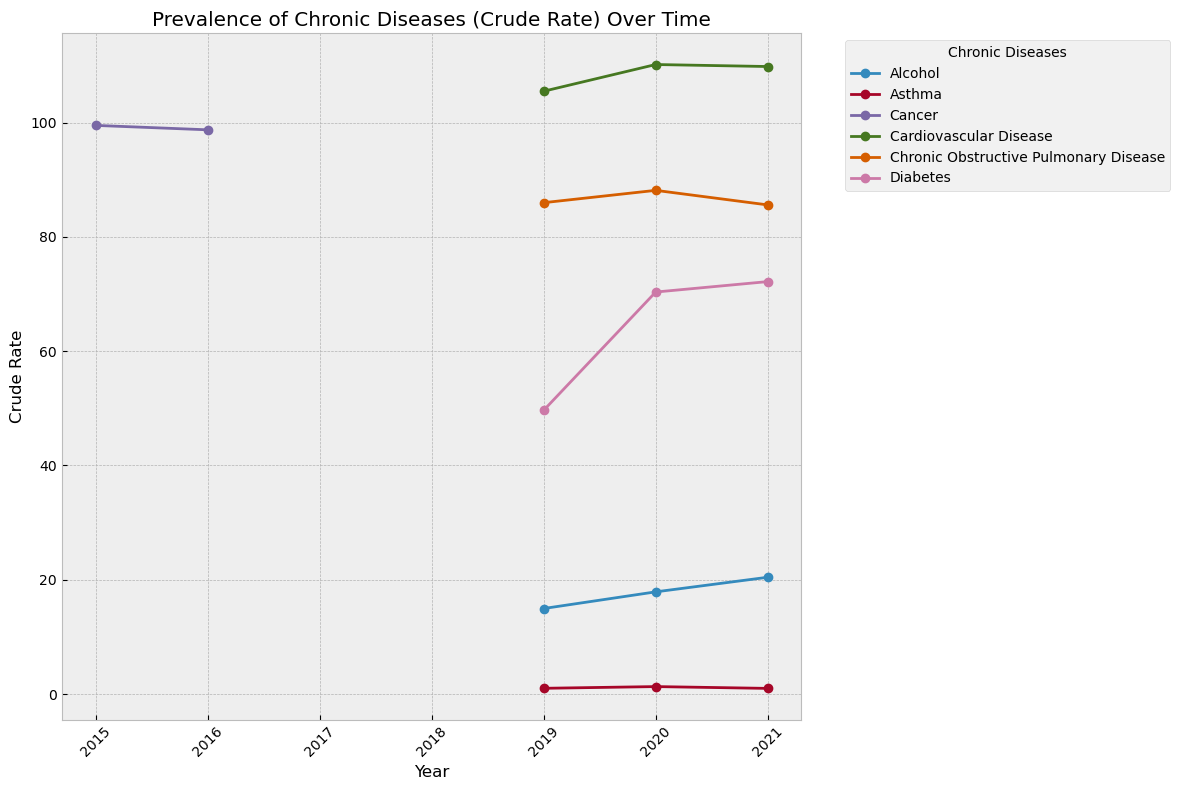

In [162]:

# Filter the DataFrame for 'Crude Rate' data value type
crude_rate_df = chronic_pivot_df.xs('Crude Rate', level='DataValueType')

# Plotting
# Plotting
crude_rate_df.T.plot(figsize=(12, 8), marker='o', linewidth=2)  # Plotting transposed DataFrame with marker style 'o' and linewidth 2

plt.title('Prevalence of Chronic Diseases (Crude Rate) Over Time')  # Setting title of the plot
plt.xlabel('Year')  # Setting label for x-axis
plt.ylabel('Crude Rate')  # Setting label for y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees
plt.legend(title='Chronic Diseases', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adding legend with title and adjusting position
plt.grid(True)  # Adding gridlines to the plot
plt.tight_layout()  # Adjusting layout to prevent overlapping elements
plt.show()  # Displaying the plot

In [138]:
year_start_array = us_chronic_df["YearStart"]
year_start_array

0       2020
1       2020
2       2020
3       2016
4       2022
        ... 
5804    2022
5805    2022
5806    2022
5807    2022
5808    2022
Name: YearStart, Length: 5809, dtype: int64

In [140]:
year_end_array = us_chronic_df["YearEnd"]
year_end_array

0       2020
1       2020
2       2020
3       2020
4       2022
        ... 
5804    2022
5805    2022
5806    2022
5807    2022
5808    2022
Name: YearEnd, Length: 5809, dtype: int64

In [141]:
year_range_dict = {"YearStart": year_start_array,
                   "YearEnd": year_end_array}
year_range_dict

{'YearStart': 0       2020
 1       2020
 2       2020
 3       2016
 4       2022
         ... 
 5804    2022
 5805    2022
 5806    2022
 5807    2022
 5808    2022
 Name: YearStart, Length: 5809, dtype: int64,
 'YearEnd': 0       2020
 1       2020
 2       2020
 3       2020
 4       2022
         ... 
 5804    2022
 5805    2022
 5806    2022
 5807    2022
 5808    2022
 Name: YearEnd, Length: 5809, dtype: int64}